In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('vader_lexicon')

In [3]:
# Read the dataset
filePath = './fake reviews dataset udated.csv'
df = pd.read_csv(filePath)
df.head()

,reviewer_name,category,rating,label,text_
0,Uthkarsh Vora,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor..."
1,Chirag Dubey,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I..."
2,Advik Barad,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...
3,Ira Chada,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i..."
4,Tara Boase,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...


In [4]:
df.shape

(40432, 5)

##Quick EDA

<Axes: title={'center': 'Count of reviews by rating'}, xlabel='rating'>

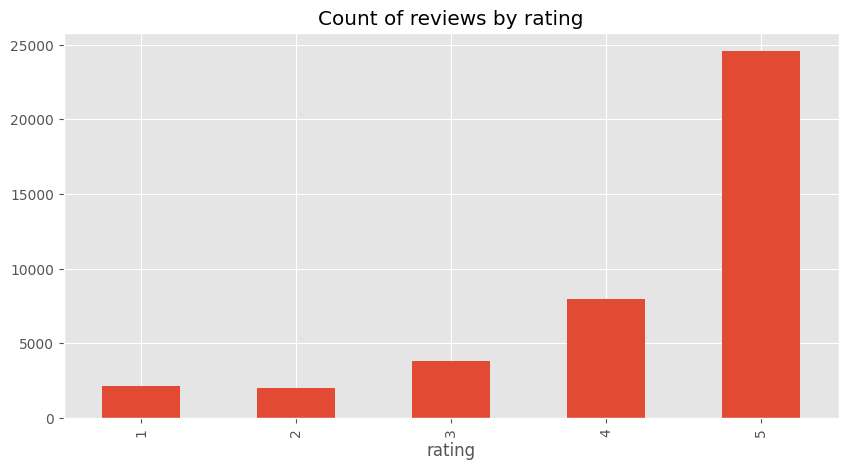

In [5]:
df['rating'].value_counts().sort_index().plot(kind='bar', title='Count of reviews by rating', figsize=(10,5))

##Basic NLTK

In [6]:
example=df['text_'][100]
print(type(example))

<class 'str'>


In [7]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['Very',
 'Soft',
 '!',
 'Definitely',
 'better',
 'quality',
 'than',
 'I',
 'was',
 'expecting']

In [8]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('Very', 'RB'),
 ('Soft', 'JJ'),
 ('!', '.'),
 ('Definitely', 'RB'),
 ('better', 'RBR'),
 ('quality', 'NN'),
 ('than', 'IN'),
 ('I', 'PRP'),
 ('was', 'VBD'),
 ('expecting', 'VBG')]

In [9]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint() #For pretty print

(S
  Very/RB
  Soft/JJ
  !/.
  Definitely/RB
  better/RBR
  quality/NN
  than/IN
  I/PRP
  was/VBD
  expecting/VBG
  ./.)


# Step 1. VADER Seniment Scoring¶
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:

Stop words are removed

each word is scored and combined to a total score.

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia=SentimentIntensityAnalyzer()

In [11]:
print("I am very glad.\n", sia.polarity_scores("I am very glad."))
print("\nI am hurt.\n", sia.polarity_scores("I am hurt."))
print('\n',example,'\n', sia.polarity_scores(example))

I am very glad.
 {'neg': 0.0, 'neu': 0.378, 'pos': 0.622, 'compound': 0.5095}

I am hurt.
 {'neg': 0.773, 'neu': 0.227, 'pos': 0.0, 'compound': -0.5267}

 Very Soft ! Definitely better quality than I was expecting. 
 {'neg': 0.0, 'neu': 0.483, 'pos': 0.517, 'compound': 0.7531}


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia=SentimentIntensityAnalyzer()

res={}

for i,row in tqdm(df.iterrows(), total=len(df)):
    text=row["text_"]
    res[text]=sia.polarity_scores(text)

vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'text_'})

vaders= vaders.merge(df, how='left')
# We have sentiment score and metadata
vaders.head(20)

In [13]:
#Run the polarity score on entire dataset
res={}

for i,row in tqdm(df.iterrows(), total=len(df)):
    text=row["text_"]
    res[text]=sia.polarity_scores(text)

  0%|          | 0/40432 [00:00<?, ?it/s]

In [21]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'text_'})

vaders= vaders.merge(df, how='left')
# We have sentiment score and metadata
vaders.head(20)

,text_,neg,neu,pos,compound,reviewer_name,category,rating,label
0,"Love this! Well made, sturdy, and very comfor...",0.000,0.248,0.752,0.9593,Uthkarsh Vora,Home_and_Kitchen_5,5,CG
1,"love it, a great upgrade from the original. I...",0.000,0.509,0.491,0.8910,Chirag Dubey,Home_and_Kitchen_5,5,CG
2,This pillow saved my back. I love the look and...,0.000,0.611,0.389,0.7906,Advik Barad,Home_and_Kitchen_5,5,CG
3,"Missing information on how to use it, but it i...",0.078,0.633,0.289,0.7463,Ira Chada,Home_and_Kitchen_5,1,CG
4,Very nice set. Good quality. We have had the s...,0.000,0.719,0.281,0.7397,Tara Boase,Home_and_Kitchen_5,5,CG
5,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.,0.000,1.000,0.000,0.0000,Dhanush Dasgupta,Home_and_Kitchen_5,3,CG
6,They are the perfect touch for me and the only...,0.000,0.701,0.299,0.7506,Yakshit Bahl,Home_and_Kitchen_5,5,CG
7,These done fit well and look great. I love th...,0.000,0.482,0.518,0.9169,Sahil Deep,Home_and_Kitchen_5,3,CG
8,"Great big numbers & easy to read, the only thi...",0.095,0.588,0.317,0.7087,Ehsaan Virk,Home_and_Kitchen_5,5,CG
9,My son loves this comforter and it is very wel...,0.000,0.559,0.441,0.8580,Kabir Chander,Home_and_Kitchen_5,5,CG


In [23]:
vaders.to_csv('review_sentiments_dataset.csv', index=False)

<Axes: xlabel='rating', ylabel='compound'>

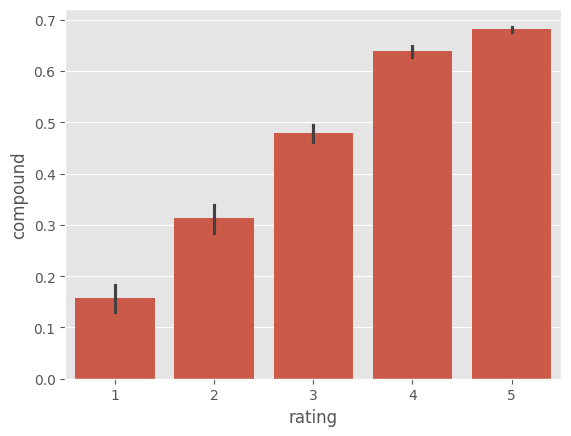

In [19]:
sns.barplot(data=vaders, x='rating', y='compound')

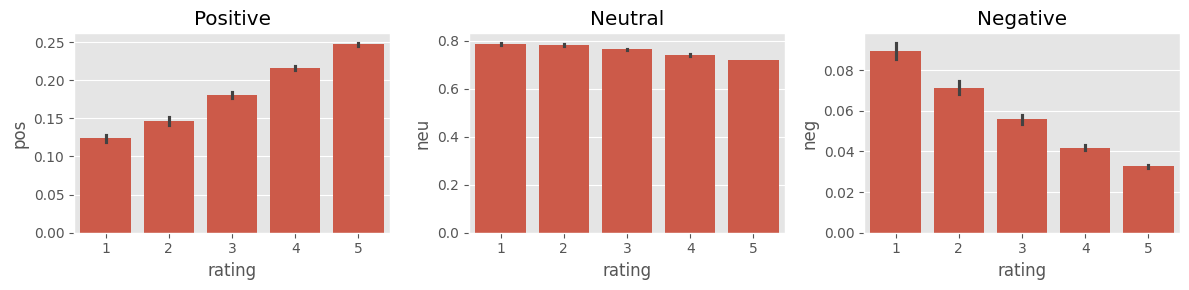

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()